In [51]:
import WeatherData.weatherData as wd
import FuturesData.futuresData as fd
import SatelliteData.satelliteData as sd
import datetime as dt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import numpy as np
import sys
import matplotlib.pyplot as plt

In [4]:
startDate = dt.datetime(2000, 7, 1)
endDate = dt.datetime(2016, 7, 15)

In [100]:
#create a new weather data object
weather_data = wd.weatherData(startDate, endDate)

Key 'cloudCover' not found. 2014-07-03 00:00:00 ommitted from calculation.
Key 'cloudCover' not found. 2015-07-05 00:00:00 ommitted from calculation.


In [6]:
#get a NVDI image for each year
satellite_data = sd.satelliteData(startDate.year, endDate.year)

Finding NDVI image for 2000
Finding NDVI image for 2001
Finding NDVI image for 2002
Finding NDVI image for 2003
Finding NDVI image for 2004
Finding NDVI image for 2005
Finding NDVI image for 2006
Finding NDVI image for 2007
Finding NDVI image for 2008
Finding NDVI image for 2009
Finding NDVI image for 2010
Finding NDVI image for 2011
Finding NDVI image for 2012
Finding NDVI image for 2013
Finding NDVI image for 2014
Finding NDVI image for 2015


In [7]:
#get result data
futures_data = fd.futuresData(startDate.year, endDate.year)

In [8]:
#reshape data
for yr in satellite_data.data:
    satellite_data.data[yr] = satellite_data.data[yr].reshape(1803*4009, 1)

In [9]:
#put into 1 array
satellite_X = [None]*len(satellite_data.data)
ctr=0
for yr in satellite_data.data:
    satellite_X[ctr]=satellite_data.data[yr]
    ctr+=1

Creating train and test sets for Sep
Doing linear regression on satellite images and futures data for Sep
MSE for Sep equals 105557.6567
Creating graph of test data


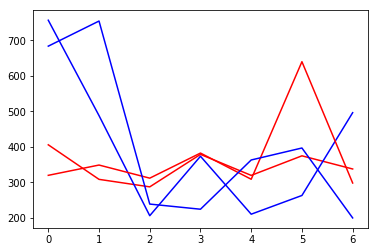

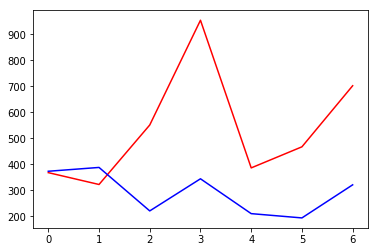

Creating train and test sets for Apr
Doing linear regression on satellite images and futures data for Apr
MSE for Apr equals 93752.4011811
Creating graph of test data


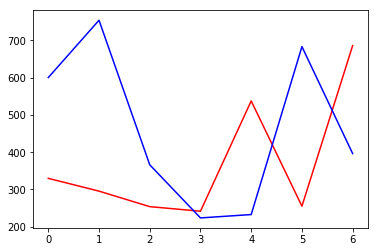

Creating train and test sets for Oct
Doing linear regression on satellite images and futures data for Oct
MSE for Oct equals 19939.624556
Creating graph of test data


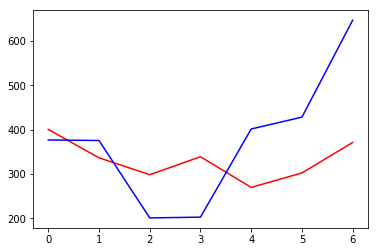

Creating train and test sets for Nov
Doing linear regression on satellite images and futures data for Nov
MSE for Nov equals 25428.5072315
Creating graph of test data


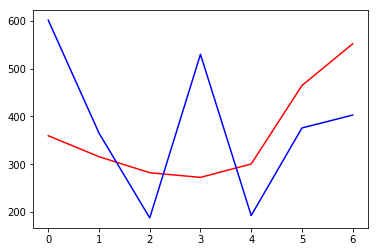

Creating train and test sets for May
Doing linear regression on satellite images and futures data for May
MSE for May equals 55563.1290108
Creating graph of test data


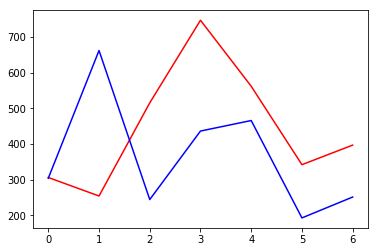

Creating train and test sets for Jun
Doing linear regression on satellite images and futures data for Jun
MSE for Jun equals 97407.2190357
Creating graph of test data


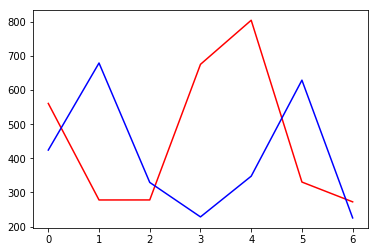

Creating train and test sets for Dec
Doing linear regression on satellite images and futures data for Dec
MSE for Dec equals 52059.1269497
Creating graph of test data


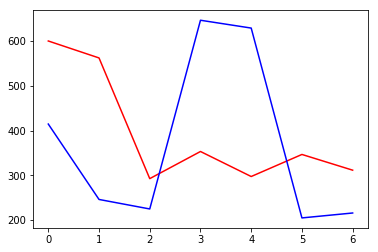

Creating train and test sets for Feb
Doing linear regression on satellite images and futures data for Feb
MSE for Feb equals 41154.4806909
Creating graph of test data


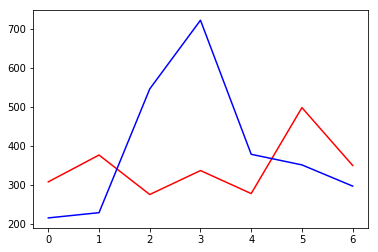

Creating train and test sets for Jul
Doing linear regression on satellite images and futures data for Jul
MSE for Jul equals 44714.7948717
Creating graph of test data


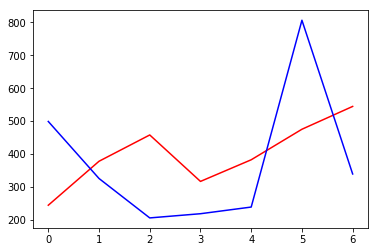

Creating train and test sets for Jan
Doing linear regression on satellite images and futures data for Jan
MSE for Jan equals 26078.4600979
Creating graph of test data


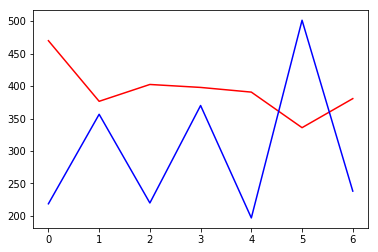

Creating train and test sets for Aug
Doing linear regression on satellite images and futures data for Aug
MSE for Aug equals 55821.18646
Creating graph of test data


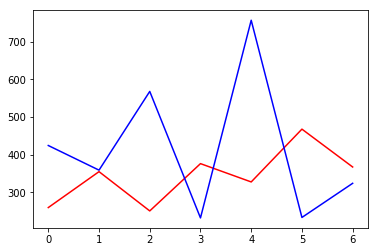

Creating train and test sets for Mar
Doing linear regression on satellite images and futures data for Mar
MSE for Mar equals 64399.3032727
Creating graph of test data


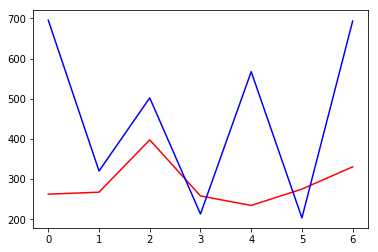

In [96]:
#Find the month with the highest predictive power from the satellite images only
minMSE = 10000000
minMSEMonth = ""
fig = plt.figure()
for mon in futures_data.data.keys():
    #Create test and train data sets
    print("Creating train and test sets for "+mon)
    X = np.array(satellite_X).reshape(16, 7228227)
    y = np.array(list(futures_data.data[mon].values()))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    #create linear regression object
    print("Doing linear regression on satellite images and futures data for "+mon)
    regr = linear_model.LinearRegression()
    currModel = regr.fit(X_train, y_train)
    #Calculate MSE
    mse = np.mean((currModel.predict(X_test)-y_test)**2)
    print("MSE for "+mon+" equals "+str(mse))
    if(mse<minMSE):
        minMSE=mse
        minMSEMonth = mon
    print("Creating graph of test data")
    predicted = currModel.predict(X_test)
    actual = y_test
    sz = range(len(y_test))
    plt.plot(sz, predicted, c='red')
    plt.plot(sz, actual, c='blue') 
    plt.show()
    
    
    

In [98]:
print(minMSEMonth)
print(minMSE)

Oct
19939.624556


So, October futures price will be the y variable from now on. Let's add in weather data.

In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [144]:
#select 20 most important pixels from the images
X = np.array(satellite_X).reshape(16, 7228227)
y = np.array(list(futures_data.data['Oct'].values()))
X_new = SelectKBest(f_regression, k=20).fit_transform(X, y)

In [148]:
#add in weather data
ctr=0
X_all = [None]*len(satellite_data.data)
for yr in weather_data.data.keys():
    vals = list(weather_data.data[yr].values())
    imgs = X_new[ctr]
    all = np.append(vals, imgs)
    X_all[ctr] = all
    ctr+=1
X_all = np.array([X_all]).reshape(16, 28)
    

In [150]:
#run regression on all variables
#create training and test data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.4)
#run linear regression
regr = linear_model.LinearRegression()
currModel = regr.fit(X_train, y_train)

In [153]:
currModel.coef_

array([   2.84311143,  -54.91741706,  105.31102694,   -0.49877815,
         -6.07448719,   -0.80069316,   92.55135174,  -17.60385039,
         -6.66930396,  -17.33177715, -137.79876185,  -98.7700608 ,
          2.5166876 , -135.755423  ,  -18.73553746,  -11.49753297,
       -106.2909117 ,  -56.57890214,  -79.03460392,  -18.12137866,
         42.64248851,  -18.26294678,  -30.10040344,    7.39783955,
         99.72688851, -205.25864156,   -7.54108529,  -90.52330994])

In [172]:
f_regression(X_all, y)

(array([  0.93624682,   1.3494409 ,   2.10856048,   0.10791524,
          2.0533486 ,   0.35835983,   1.37762359,   1.12605988,
         39.81727707,  58.44324856,  64.51147658,  45.35577791,
         45.33923689,  60.03610172,  61.19237671,  63.11041688,
         41.19779153,  50.59101962,  63.06948187,  44.72444002,
         52.55881234,  43.8898125 ,  40.2888617 ,  56.09123985,
         40.15010721,  42.96824641,  45.22481334,  46.35821827]),
 array([  3.49664228e-01,   2.64798637e-01,   1.68518318e-01,
          7.47392183e-01,   1.73823736e-01,   5.58980500e-01,
          2.60087745e-01,   3.06581294e-01,   1.92252788e-05,
          2.31402165e-06,   1.30741591e-06,   9.55313496e-06,
          9.57214086e-06,   1.98286936e-06,   1.77630536e-06,
          1.48555516e-06,   1.60422287e-05,   5.23143515e-06,
          1.49116246e-06,   1.03102032e-05,   4.22551742e-06,
          1.14187220e-05,   1.80629894e-05,   2.92552069e-06,
          1.83964112e-05,   1.28042693e-05,   9.704805

In [154]:
#Calculate MSE
mse = np.mean((currModel.predict(X_test)-y_test)**2)
print(mse)

5159.23833532


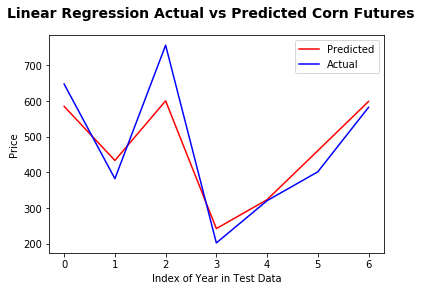

In [167]:
#graph
predicted = currModel.predict(X_test)
actual = y_test
sz = range(len(y_test))
fig = plt.figure()
fig.suptitle('Linear Regression Actual vs Predicted Corn Futures', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Index of Year in Test Data')
ax.set_ylabel('Price')
pr = plt.plot(sz, predicted, c='red', label='Predicted')
ac = plt.plot(sz, actual, c='blue', label='Actual') 
plt.legend()
plt.show()

In [203]:
#Now the same with ridge regression
#run regression on all variables
#create training and test data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.4)
#run linear regression
regr = linear_model.Ridge()
currModel = regr.fit(X_train, y_train)

In [204]:
#Calculate MSE
mse = np.mean((currModel.predict(X_test)-y_test)**2)
print(mse)

33865.2313745


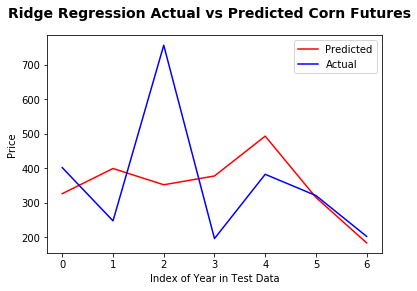

In [206]:
#graph
predicted = currModel.predict(X_test)
actual = y_test
sz = range(len(y_test))
fig = plt.figure()
fig.suptitle('Ridge Regression Actual vs Predicted Corn Futures', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Index of Year in Test Data')
ax.set_ylabel('Price')
pr = plt.plot(sz, predicted, c='red', label='Predicted')
ac = plt.plot(sz, actual, c='blue', label='Actual') 
plt.legend()
plt.show()

In [209]:
#Now the same with Theil-Sen Estimator: robust multivariate regression model.
#run regression on all variables
#create training and test data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.4)
#run linear regression
regr = linear_model.TheilSenRegressor()
currModel = regr.fit(X_train, y_train)

In [210]:
#Calculate MSE
mse = np.mean((currModel.predict(X_test)-y_test)**2)
print(mse)

6056.93650637


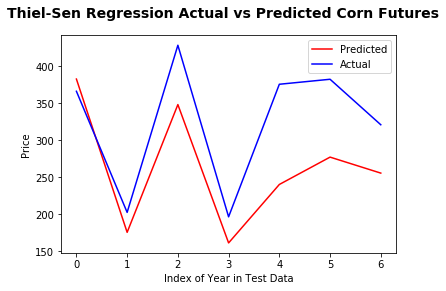

In [212]:
#graph
predicted = currModel.predict(X_test)
actual = y_test
sz = range(len(y_test))
fig = plt.figure()
fig.suptitle('Thiel-Sen Regression Actual vs Predicted Corn Futures', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Index of Year in Test Data')
ax.set_ylabel('Price')
pr = plt.plot(sz, predicted, c='red', label='Predicted')
ac = plt.plot(sz, actual, c='blue', label='Actual') 
plt.legend()
plt.show()

In [223]:
#Now the same with Lasso Regressor
#run regression on all variables
#create training and test data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.4)
#run linear regression
regr = linear_model.Lasso()
currModel = regr.fit(X_train, y_train)

In [224]:
#Calculate MSE
mse = np.mean((currModel.predict(X_test)-y_test)**2)
print(mse)

15609.7453017


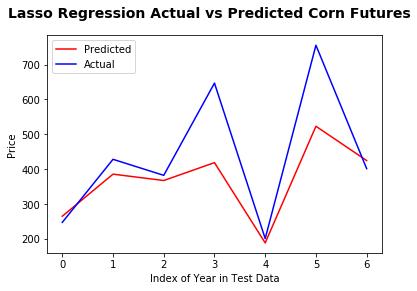

In [226]:
#graph
predicted = currModel.predict(X_test)
actual = y_test
sz = range(len(y_test))
fig = plt.figure()
fig.suptitle('Lasso Regression Actual vs Predicted Corn Futures', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Index of Year in Test Data')
ax.set_ylabel('Price')
pr = plt.plot(sz, predicted, c='red', label='Predicted')
ac = plt.plot(sz, actual, c='blue', label='Actual') 
plt.legend()
plt.show()

In [228]:
#Find average MSE for each type of model
lasso = 0
theilsen=0
linear=0
ridge=0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.4)
    #run lasso regression
    regr = linear_model.Lasso()
    currModel = regr.fit(X_train, y_train)
    lasso +=np.mean((currModel.predict(X_test)-y_test)**2)
    #run linear regression
    regr = linear_model.LinearRegression()
    currModel = regr.fit(X_train, y_train)
    linear +=np.mean((currModel.predict(X_test)-y_test)**2)
    #run theilsen regression
    regr = linear_model.TheilSenRegressor()
    currModel = regr.fit(X_train, y_train)
    theilsen +=np.mean((currModel.predict(X_test)-y_test)**2)
    #run ridge regression
    regr = linear_model.Ridge()
    currModel = regr.fit(X_train, y_train)
    ridge +=np.mean((currModel.predict(X_test)-y_test)**2)
#compute and print average
lasso= lasso/10
theilsen = theilsen/10
ridge = ridge/10
linear=linear/10
print("Lasso avg MSE="+str(lasso))
print("Theil-Sen avg MSE="+str(theilsen))
print("Ridge avg MSE="+str(ridge))
print("Linear avgMSE="+str(linear))

Lasso avg MSE=11932.2282858
Theil-Sen avg MSE=5813.33311026
Ridge avg MSE=12531.5055227
Linear avgMSE=6096.72460034


How does this change with more training data?

In [230]:
#Find average MSE for each type of model
lasso = 0
theilsen=0
linear=0
ridge=0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.25)
    #run lasso regression
    regr = linear_model.Lasso()
    currModel = regr.fit(X_train, y_train)
    lasso +=np.mean((currModel.predict(X_test)-y_test)**2)
    #run linear regression
    regr = linear_model.LinearRegression()
    currModel = regr.fit(X_train, y_train)
    linear +=np.mean((currModel.predict(X_test)-y_test)**2)
    #run theilsen regression
    regr = linear_model.TheilSenRegressor()
    currModel = regr.fit(X_train, y_train)
    theilsen +=np.mean((currModel.predict(X_test)-y_test)**2)
    #run ridge regression
    regr = linear_model.Ridge()
    currModel = regr.fit(X_train, y_train)
    ridge +=np.mean((currModel.predict(X_test)-y_test)**2)
#compute and print average
lasso= lasso/10
theilsen = theilsen/10
ridge = ridge/10
linear=linear/10
print("Lasso avg MSE="+str(lasso))
print("Theil-Sen avg MSE="+str(theilsen))
print("Ridge avg MSE="+str(ridge))
print("Linear avgMSE="+str(linear))

Lasso avg MSE=7803.68004331
Theil-Sen avg MSE=2907.03348135
Ridge avg MSE=13021.9655095
Linear avgMSE=2747.24529258


Much better - more years would have been a huge improvement